# Before the beginning

Create or complete your own module with the functions that were previously used in class and create new ones based on your existing code. Functions that have been used:
  - `mySize()`: calculates the size of the 'figure'
  - `myplot()`: displays images
  - `myOtsu()`: histogram progression

Create functions:
  - `myStretch()`: histogram stretching
  - `imToGray()`: conversion of the 'rgb' image to greyscale
  - `myEqual()`: histogram equalization

# Start

1. Import Python modules
2. Import your own functions
3. Open images and convert to numpy arrays


# Import Python modules

## *sys*

From [Python website](https://docs.python.org/3/library/sys.html):
  > This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.

## *pathlib*

From [Python website](https://docs.python.org/3.7/library/pathlib.html):
  > This module offers classes representing filesystem paths with semantics appropriate for different operating systems

In [1]:
import sys
from pathlib import Path
import numpy as np
from matplotlib import pylab as plt
from PIL import Image

# Import user modules

 - set the address of the folder with your own modules (myImProc.py)
 - add an address as a temporary search path for the modules
 - import modules

In [2]:
# %pwd: checks the address of the current directory
cur_dir = %pwd
print(f'current directory: {cur_dir}\n')

current directory: /home/u1/22_dydaktyka/05imProc



In [3]:
# %ls: checks the contents of the current directory
print('the contents of the current directory:\n')
%ls

the contents of the current directory:

beti.tif                                lab01.ipynb
function_01.ipynb                       lab02.ipynb
im02xxx.ipynb                           lab03.ipynb
im03xxx.ipynb                           lab05.ipynb
image-processing-with-numpy-master.zip  lab2appendix.ipynb
img_copy/                               lab3xx.ipynb
img_test/                               README.md
install.md                              Scikit-image-processing-master.zip
kod/


In [4]:
# %ls: checks the contents of the 'kod' directory
print('\ncontents of the "kod" catalogue:\n')
%ls kod


contents of the "kod" catalogue:

myImProc.py  __pycache__/


### Adding a temporary search path for modules

In [5]:
dir_add = Path('./kod/')
print(f'directory:\t{dir_add}\ntype:\t\t{type(dir_add)}')

directory:	kod
type:		<class 'pathlib.PosixPath'>


In [6]:
# 'resolve()' for full path
dir_add = dir_add.resolve()
print(f'directory:\t{dir_add}\ntype:\t\t{type(dir_add)}')

directory:	/home/u1/22_dydaktyka/05imProc/kod
type:		<class 'pathlib.PosixPath'>


In [7]:
# path as string
dir_add = dir_add.as_posix()
print(f'directory:\t{dir_add}\ntype:\t\t{type(dir_add)}')

directory:	/home/u1/22_dydaktyka/05imProc/kod
type:		<class 'str'>


In [8]:
# adding a temporary search path for modules
sys.path.append(dir_add)
sys.path

['/home/u1/22_dydaktyka/05imProc',
 '/home/u1/anaconda3/envs/lab2/lib/python38.zip',
 '/home/u1/anaconda3/envs/lab2/lib/python3.8',
 '/home/u1/anaconda3/envs/lab2/lib/python3.8/lib-dynload',
 '',
 '/home/u1/anaconda3/envs/lab2/lib/python3.8/site-packages',
 '/home/u1/anaconda3/envs/lab2/lib/python3.8/site-packages/IPython/extensions',
 '/home/u1/.ipython',
 '/home/u1/22_dydaktyka/05imProc/kod']

### Importing own functions

In [9]:
# import my function
from myImProc import mySize, myplot, rgbToGray, myStretch, myOtsu, myEqual

# Opening and conversion of images

Three images were used for the exercise:
  - `lena_color_512.tif`
  - `cameraman.tif`
  - `peppers_color.jpg`
  - Sentinel satellite image.
  
#### Sentinel

From https://apps.sentinel-hub.com/sentinel-playground/:
  - search for a city such as Krakow
  - zoom in to see the details of the image
  - download the visible part of the image to disk (default format is jpg)
 

## Opening images

To open image files were used to:
  - loops 'for'
  - the built-in `exec()` function

> `exec()`: see the [Python documentation](https://docs.python.org/3.7/library/functions.html#exec). The function allows you to execute code saved as a string. This allows you to prepare expressions using string formatting.


In [10]:
addresses = ['./img_test/lena_color_512.tif','./img_test/peppers_color.jpg',\
             './img_test/cameraman.tif','./img_test/sent.jpg']

# set names for images
variables = ['arLena','veget','arMan','sent']
print(f'addresses:\n{addresses}\n\nvariables:\n{variables}')

addresses:
['./img_test/lena_color_512.tif', './img_test/peppers_color.jpg', './img_test/cameraman.tif', './img_test/sent.jpg']

variables:
['arLena', 'veget', 'arMan', 'sent']


In [11]:
# checks the correctness of the expression being created
tmp = '{0} = np.array(Image.open("{1}"))'.format(variables[0],addresses[0])
print(tmp)

arLena = np.array(Image.open("./img_test/lena_color_512.tif"))


In [12]:
# checks the creation of expressions in the loop
for var,add in zip(*[variables,addresses]):
    expr = '{0} = np.array(Image.open("{1}"))'.format(var,add)
    print(f'Expression:\t{expr}')

Expression:	arLena = np.array(Image.open("./img_test/lena_color_512.tif"))
Expression:	veget = np.array(Image.open("./img_test/peppers_color.jpg"))
Expression:	arMan = np.array(Image.open("./img_test/cameraman.tif"))
Expression:	sent = np.array(Image.open("./img_test/sent.jpg"))



shapes: (512, 512, 3), (512, 512, 3), (848, 1840, 3)


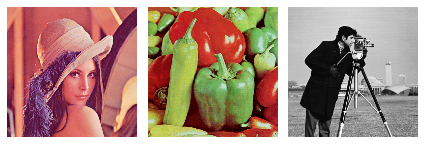

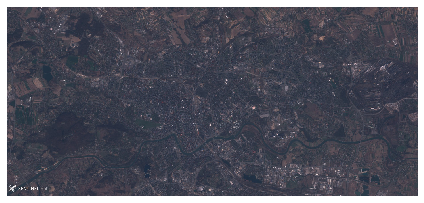

In [13]:
# starts a loop to open image files
for var,add in zip(*[variables,addresses]):
    expr = '{0} = np.array(Image.open("{1}"))'.format(var,add)
    exec(expr)

myplot([arLena,veget,arMan])
myplot([sent])
print(f'\nshapes: {arLena.shape}, {veget.shape}, {sent.shape}')

# Conversion to grayscale

1. Comparing 'veget' images at three different weights:
    - $R = 0.3$, $B = 0.59$, $G = 0.11$ - [0.3,0.59,0.11]
    - one to one: [0.33,0.33,0.33]
    - common channel scales: [0.11,0.59,0.3]
    - other weights: [0.7,0.1,0.2]

In [14]:
weights=[[1,0,0],[0,1,0],[0,0.0,1]]

# starts a loop conversion
for i,var in enumerate(['veget1','veget2','veget3']):
    expr = '{0} = rgbToGray(veget,{1})'.format(var,weights[i])
    print(f'Expression: {expr}')
    exec(expr)

Expression: veget1 = rgbToGray(veget,[1, 0, 0])
Expression: veget2 = rgbToGray(veget,[0, 1, 0])
Expression: veget3 = rgbToGray(veget,[0, 0.0, 1])


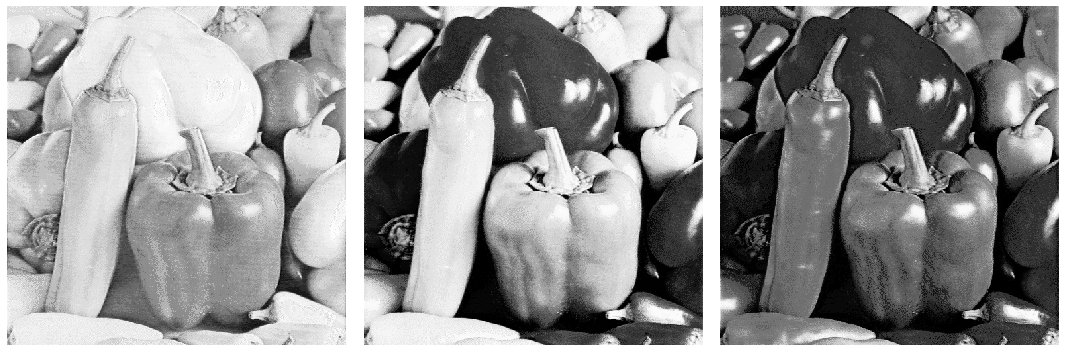

In [15]:
# displays the results
w,h=mySize([veget1,veget2,veget3])

myplot([veget1,veget2,veget3],size=(w,h))
del veget1,veget2,veget3

### Conversion of other images with default weights

In [16]:
# weights=[0.3,0.59,0.11]
for var in ['arLena','sent']:
    expr = '{0} = rgbToGray({0})'.format(var)
    print(f'Expression: {expr}')
    exec(expr)


Expression: arLena = rgbToGray(arLena)
Expression: sent = rgbToGray(sent)


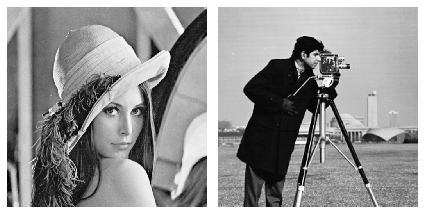

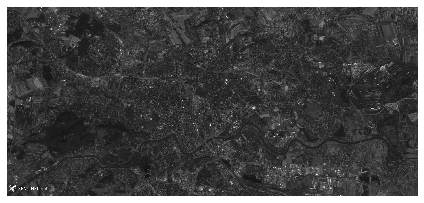

In [17]:
myplot([arLena,arMan])
myplot([sent])

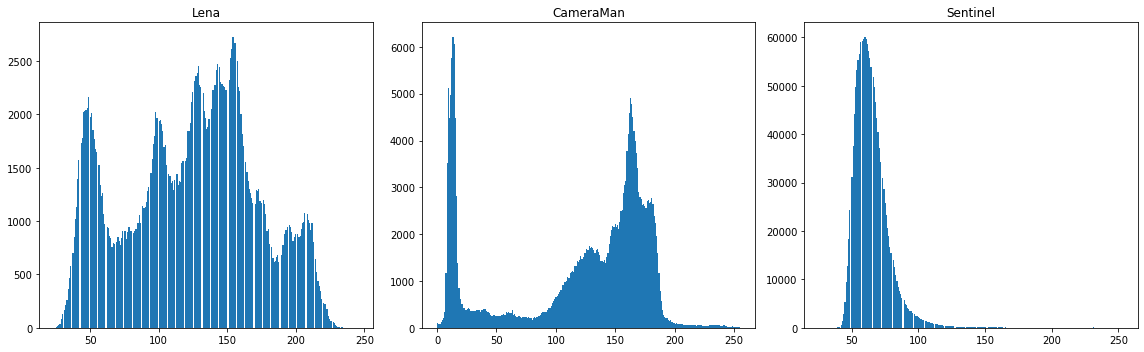

In [18]:
# displays histograms
tit = ['Lena','CameraMan','Sentinel']
myplot([arLena,arMan,sent],title=tit,hist=True,size=(16,5))
del tit

# Histogram stretching

On the basis of histograms, threshold values were selected:
  - arLena: (15,225)
  - arMan: (5,195)
  - sent: (40,110)

Transformation coefficients:
             a: 1.2142857142857142, b: -18.214285714285705

Transformation coefficients:
             a: 1.3421052631578951, b: -6.710526315789389

Transformation coefficients:
             a: 3.642857142857145, b: -145.71428571428578



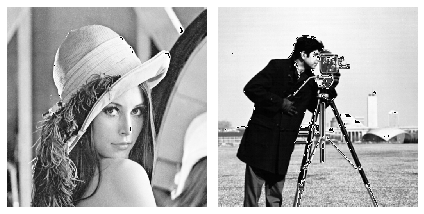

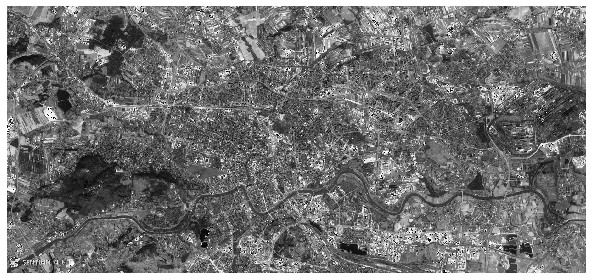

In [19]:
# by analyzing the above histograms, set thresholds:
th = [(15,225),(5,195),(40,110)]
ims_stretch = []
for i,img in enumerate([arLena,arMan,sent]):
    ims_stretch.append(myStretch(img,th[i]))

arLena_st,arMan_st,sent_st = ims_stretch

myplot([arLena_st,arMan_st])
myplot([sent_st],size=(13,4))

# Histogram equalization

 1. Calculation of the image histogram
 2. Calculation CDF (cumulative distributive function)
 3. Calculation of the LUT table values
 4. Assigning new values to an image
 
 The example will use the image `cameraman.tif` (variable  `arMan`):
 
 
 ## CDF for a discrete random variable
 
 Assumptions:
  - the variable x belongs to the set: $[x_1,x_2,...x_n)$: $x \in [x_k,...,x_n)$
  - $x_1 < x_2 < ... < x_n$

 $$ F(x) = P(X \leqslant x) = \sum_{k=1}^{n-1}P(X = x_k) $$
 
 For an 8-bit image:
- $dn \in (0,1,\dots 255)$ - range of possible values in the image
- $k = 1,2,\dots 256$ - no. of bins
- $nk = 256$ - number of possible image values (on 8 bits is 256)
- $f_k$ - frequency of occurrence of $dn_k$ values in the image (number of pixels with $dn_k$ values)
- $F(x_k) = D_k = \frac{f_1 + f_2 + c\dots + f_k}{N}$ - cumulative sum of values from $f_1$ to $f_k$ divided by the number ($N$) of all pixels in the image
- $N$ - total pixels (image size)
    - finally: $$ D = D_1,D_1+D_2,D_1+D_2+D_3,\cdots, D_1+\cdots D_k $$


### Calculation of the image histogram

freq.size: 256,		bins.size: 257,		bins[1:].size: 256


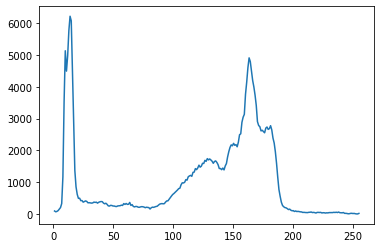

In [20]:
freq,bins = np.histogram(arMan.ravel(),bins=256,range=(0,255),density=False)
print(f'freq.size: {freq.size},\t\tbins.size: {bins.size},\t\t\
bins[1:].size: {bins[1:].size}')
plt.plot(bins[1:],freq);

### Calculation CDF (cumulative distributive function)

> `np.cumsum()`: return the cumulative sum of the elements along a given axis.

In [21]:
# how the np.cumsum() function works
tmp = np.arange(6) # frequencies
print(f'tmp:\t{tmp}\ncumsum: {np.cumsum(tmp)}\n\
cdf:\t{np.cumsum(tmp)/np.sum(tmp)}')
del tmp

tmp:	[0 1 2 3 4 5]
cumsum: [ 0  1  3  6 10 15]
cdf:	[0.         0.06666667 0.2        0.4        0.66666667 1.        ]


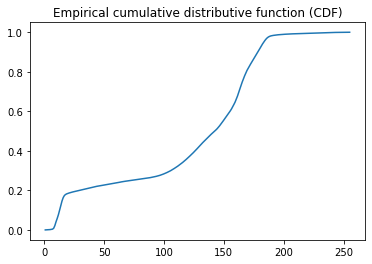

In [22]:
# D: empirical cumulative distributive function (CDF)
D = np.cumsum(freq)/sum(freq)
plt.plot(bins[1:],D);
plt.title('Empirical cumulative distributive function (CDF)');

 ### Look Up Table (LUT)
 
 $$ LUT(k) = \frac{P(x_k)-P(x_{min})}{1 - P(x_{min})} * (nk - 1)\
 = \frac{D_k-D_{min}}{1 - D_{min}}  * (nk - 1)$$
 
 $D_{min}$ - this is the smallest cumulative value $D_k$ greater than zero

D_min: 0.00038909912109375,	1-D_min: 0.9996109008789062
LUT.min(): 0,	LUT.max(): 255,	LUT.size: 256


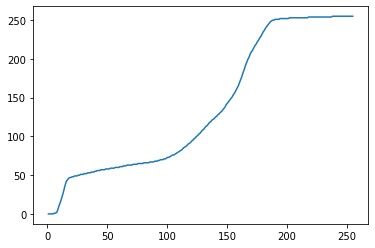

In [23]:
D_min = D[D>0].min() # get smallest value of 𝐷, greater than zero
nk = 256         # number of possible image values

LUT = ((D - D_min)/(1-D_min))*(nk-1)
LUT = np.round(LUT,0).astype(np.uint8)
print(f'D_min: {D_min},\t1-D_min: {1 - D_min}\nLUT.min(): {LUT.min()},\t\
LUT.max(): {LUT.max()},\tLUT.size: {LUT.size}')
plt.plot(bins[1:],LUT);

### Assigning new values to an image

The LUT table is a function to convert old image values to new ones. Conversion principle:
  - `LUT` - one-dimensional array of numbers
  - The index `i` of the `LUT` table is the old value in the image: $v_{old} = i$
  - The new image value is the value of the `LUT` table: $v_{new} = LUT[i]$

In [24]:
# new image based on the original
arMan_eq = arMan.copy()

# replaces the original values with new ones 
for i in range(LUT.size):
    arMan_eq[arMan==i] = LUT[i]
    
del freq, bins, D, D_min, LUT, i

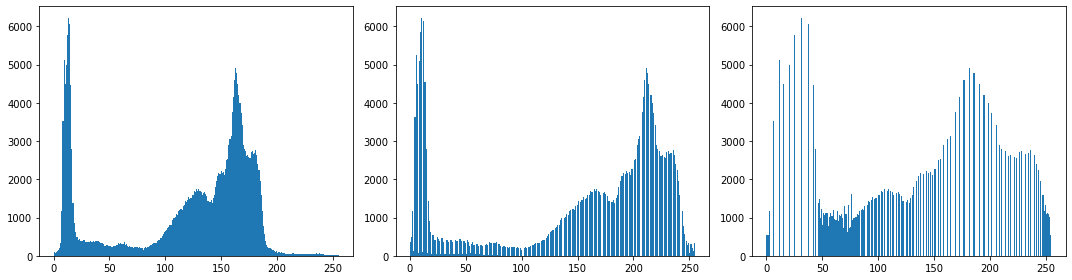

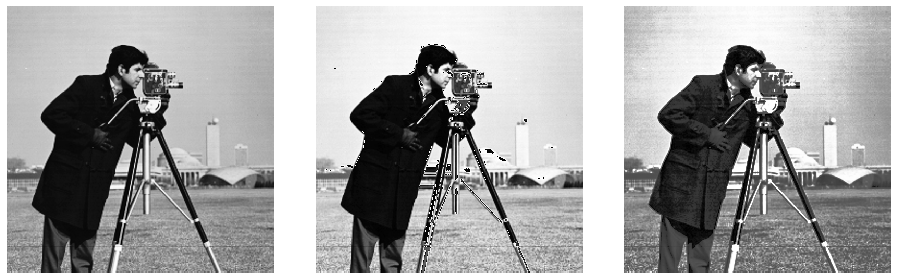

In [25]:
# comparison of images and histograms: original, after stretching, after equalization
myplot([arMan,arMan_st,arMan_eq],hist=True,size=(15,4))
myplot([arMan,arMan_st,arMan_eq],size=(13,4))

### Create simple functions!!!

Histogram equalization function:
>based on the code tested above, write the functions and save it to your module.

# Make a comparison!!

>Comparison of images and histograms  

>Images: original, after stretching, after equalization